# Aspects numériques des modèles d'endommagement locaux



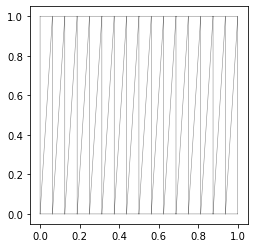

In [10]:
from dolfin import *
%matplotlib inline
from local_damage import *

# set_loglevel

problem = "homog"
refinement_level = 4
hole_spacing     = 0.
hole_radius      = 0.2
aspect_ratio     = 1    #fix

unloading        = False #True if you want to consider discharge
export_results   = True

## Material properties
#   - Elastic properties
E  = 6.e3
nu = 0.3

#   - Damage properties
R0 = 3e-3
alpha = 8 #depending on the value, one can either : not damage, damage, break

# Loading steps
Nincr = 100

# Maximum imposed displacement
Umax = 3e-3

mesh, facets = setup_geometry(problem, refinement_level, hole_spacing, hole_radius, aspect_ratio)

plt.figure()
plot(mesh, linewidth=0.5)
plt.show()

# Maximum number of increments in fixed point
Nitermax = 200
# Convergence tolerance for fixed point
tol = 1e-4
mech_params = (E, nu, R0, alpha, Umax, Nincr)
prob_params = (problem, unloading, export_results, Nitermax, tol)

In [11]:
results, u, d, sig = solve_problem(mesh, facets, prob_params, mech_params)

Increment   1
    Iteration   0: ||Res||=0.000000e+00
Solving linear variational problem.
Increment   2
    Iteration   0: ||Res||=0.000000e+00
Increment   3
    Iteration   0: ||Res||=0.000000e+00
Solving linear variational problem.
Solving linear variational problem.
Increment   4
Solving linear variational problem.
    Iteration   0: ||Res||=0.000000e+00
Increment   5
    Iteration   0: ||Res||=0.000000e+00
Solving linear variational problem.
Increment   6
Solving linear variational problem.
    Iteration   0: ||Res||=0.000000e+00
Increment   7
    Iteration   0: ||Res||=0.000000e+00
Solving linear variational problem.
Increment   8
    Iteration   0: ||Res||=0.000000e+00Solving linear variational problem.

Increment   9
    Iteration   0: ||Res||=0.000000e+00
Solving linear variational problem.
Increment  10
    Iteration   0: ||Res||=0.000000e+00
Solving linear variational problem.
Increment  11
    Iteration   0: ||Res||=0.000000e+00
Increment  12Solving linear variational proble

Dissipated energy/R0: 4.254285220360478
Maximum stress:       7.793982000000004
Strain at max stress: 0.00174


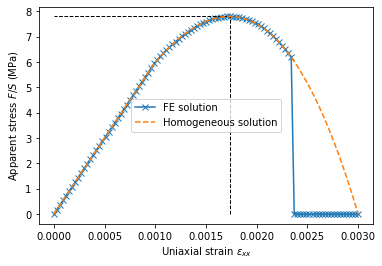

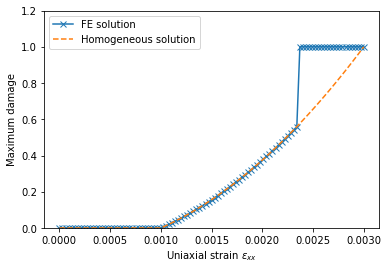

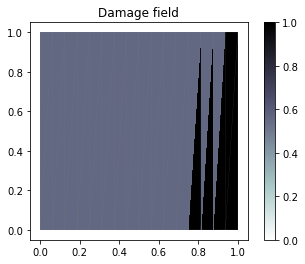

Object cannot be plotted directly, projecting to piecewise linears.


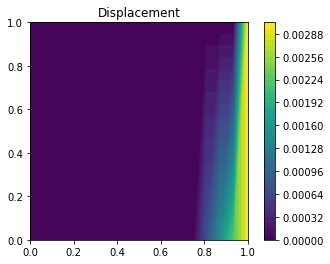

Object cannot be plotted directly, projecting to piecewise linears.


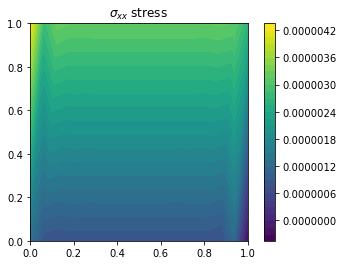

In [12]:
plot_results(problem, results, E, R0, alpha, d, u, sig, mesh, export_results)

When first running the code, the numerical solution is good wrt analytical solution.

We then modify some elements :
* as one decreases $\alpha$, we tend to the case $\epsilon=\epsilon_{max}$ ;
* by opposition, as one increases $\alpha$, we allow the structure to suffer higher deformation before breaking ;
* if one discharge, it works as long as $\alpha$ big enough for one to reach $\epsilon=\epsilon_c$ ($\alpha$ is our loading parameter here, namely one can modify it to modify $\epsilon$ in order to ensure we eventually reach $\epsilon=\epsilon_c$) ;

* **~By refining the mesh, we add element but that brings an "error". In fact, we then highlight the beam is heterogeneous such that we have a damaged phase and an healthy one at the same time in the beam. The case with more elements is closer to reality, and the jump we observe corresponds to the point where we go from damage beam to healthy one.**

$\Rightarrow$ **Homogeneous phase and then heterogeneous one ?? or rather homogeneous damage and then other phase where no damage.**

Note : ~ it's possible to get position of transition in simple analytical cases by considering $\frac{\partial u}{\partial x}=t$ as our loading parameter.

By increasing refinement (i.e. increasing nb of elements), we verify we converge towards a unique transition point. We should moreover have deformed transition at rhs of the beam even though it's not really the case here (numerical error ? maybe more elements in both directions ?).